# Modelo para a espécie American Toad

## Limpando dataset

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [141]:
base = pd.read_csv("americanToadCorre.csv")

In [142]:
base.drop('id',axis=1,inplace=True)
base.head()

,date,lat,lng,tornado,monthtodatesnowfalli,thunder,meantempi,snow,meanvism,meanwdire,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,NaN,0.0,62.0,0.0,NaN,Variable,...,-1.0,48.0,NaN,75.0,NaN,12.0,NaN,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,NaN,0.0,52.0,0.0,27.6,NE,...,38.0,50.0,17.2,98.0,NaN,6.0,NaN,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,NaN,0.0,44.0,0.0,NaN,ENE,...,59.0,36.0,NaN,100.0,NaN,-2.0,NaN,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,NaN,0.0,46.0,0.0,NaN,NW,...,320.0,38.0,NaN,95.0,NaN,5.0,NaN,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,NaN,0.0,40.0,0.0,NaN,South,...,191.0,30.0,NaN,83.0,NaN,0.0,NaN,49.0,39.0,21.0


In [143]:
base.shape

(3682, 72)

In [144]:
#Base original
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 72 columns):
date                                  3682 non-null int64
lat                                   3682 non-null float64
lng                                   3682 non-null float64
tornado                               3561 non-null float64
monthtodatesnowfalli                  24 non-null object
thunder                               3561 non-null float64
meantempi                             3502 non-null float64
snow                                  3561 non-null float64
meanvism                              1691 non-null float64
meanwdire                             3430 non-null object
minhumidity                           3484 non-null float64
maxvism                               1691 non-null float64
since1jancoolingdegreedays            39 non-null float64
coolingdegreedays                     3502 non-null float64
maxdewptm                             3484 non-null float64
m

In [145]:
#Descrição da base original
base.describe()

,date,lat,lng,tornado,thunder,meantempi,snow,meanvism,minhumidity,maxvism,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
count,3.682000e+03,3682.000000,3682.000000,3561.0,3561.000000,3502.000000,3561.000000,1691.000000,3484.000000,1691.000000,...,3561.000000,3484.000000,1691.00000,3484.000000,24.0,3503.000000,24.000000,3503.000000,3484.000000,3484.000000
mean,2.008290e+07,83.060589,-195.113192,0.0,0.046616,58.595945,0.005336,17.144648,43.931688,20.598108,...,138.276889,48.096728,10.66984,89.204937,0.0,8.805881,36.750000,69.580645,53.421929,42.293915
std,5.150981e+04,1335.710082,2890.273947,0.0,0.210845,9.752716,0.072860,5.771699,18.516513,4.592061,...,116.293902,11.177302,3.59805,11.459220,0.0,5.713660,29.078679,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-72893.000000,0.0,0.000000,-11.000000,0.000000,1.600000,4.000000,3.000000,...,-1.000000,-17.000000,1.00000,24.000000,0.0,-33.000000,0.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.759113,0.0,0.000000,52.000000,0.000000,13.650000,30.000000,16.000000,...,-1.000000,40.000000,8.50000,84.000000,0.0,5.000000,0.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.0,0.000000,59.000000,0.000000,16.000000,42.500000,24.100000,...,146.000000,49.000000,10.00000,93.000000,0.0,9.000000,58.800000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.505545,0.0,0.000000,66.000000,0.000000,23.400000,56.000000,24.100000,...,234.000000,56.000000,14.60000,99.000000,0.0,13.000000,58.800000,77.000000,61.000000,51.000000
max,2.018100e+07,47097.000000,-52.736600,0.0,1.000000,85.000000,1.000000,29.200000,100.000000,32.200000,...,360.000000,77.000000,18.10000,100.000000,0.0,25.000000,58.800000,130.000000,88.000000,75.000000


In [146]:
# Elimina as features com poucos valores ou as que são preenchidas com 0
zeros = []
poucos = []
for c in base.columns:
    if (base[c].dtype != 'object' and base[c].mean() == 0):
        base.drop(c,axis=1,inplace=True)
        zeros.append(c)
    elif (base[c].count() < 1700):
        poucos.append(c)
        base.drop(c,axis=1,inplace=True)
zeros

['tornado', 'snowdepthm', 'snowdepthi']

In [147]:
poucos

['monthtodatesnowfalli',
 'meanvism',
 'maxvism',
 'since1jancoolingdegreedays',
 'monthtodatecoolingdegreedays',
 'since1sepheatingdegreedays',
 'since1julsnowfallm',
 'monthtodatesnowfallm',
 'since1sepcoolingdegreedaysnormal',
 'monthtodateheatingdegreedaysnormal',
 'snowfallm',
 'since1julheatingdegreedays',
 'coolingdegreedaysnormal',
 'minvisi',
 'since1sepheatingdegreedaysnormal',
 'since1julheatingdegreedaysnormal',
 'snowfalli',
 'monthtodateheatingdegreedays',
 'monthtodatecoolingdegreedaysnormal',
 'since1sepcoolingdegreedays',
 'minvism',
 'maxvisi',
 'heatingdegreedaysnormal',
 'since1jancoolingdegreedaysnormal',
 'meanvisi',
 'since1julsnowfalli']

In [148]:
base.shape

(3682, 43)

In [149]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,62.0,0.0,Variable,50.0,0.0,10.0,...,16.0,30.04,30.01,-1.0,48.0,75.0,12.0,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,52.0,0.0,NE,46.0,0.0,12.0,...,12.0,30.26,30.03,38.0,50.0,98.0,6.0,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,44.0,0.0,ENE,36.0,0.0,6.0,...,7.0,30.22,30.07,59.0,36.0,100.0,-2.0,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,46.0,0.0,NW,51.0,0.0,7.0,...,7.0,29.61,29.49,320.0,38.0,95.0,5.0,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,40.0,0.0,South,32.0,0.0,4.0,...,4.0,30.27,30.12,191.0,30.0,83.0,0.0,49.0,39.0,21.0
5,20100709,46.438330,-64.127423,0.0,73.0,0.0,SW,52.0,8.0,21.0,...,22.0,30.01,29.89,218.0,66.0,92.0,19.0,80.0,69.0,62.0
6,20110512,46.334425,-63.703709,0.0,42.0,0.0,NE,77.0,0.0,4.0,...,5.0,30.17,30.04,39.0,38.0,95.0,4.0,44.0,39.0,37.0
7,20020830,50.705795,-97.102335,0.0,72.0,0.0,SSE,79.0,6.0,22.0,...,22.0,NaN,NaN,162.0,69.0,100.0,20.0,75.0,71.0,66.0
8,20020914,50.705795,-97.102335,0.0,54.0,0.0,WNW,38.0,0.0,8.0,...,12.0,NaN,NaN,297.0,43.0,96.0,7.0,64.0,46.0,38.0
9,20020917,50.705795,-97.102335,0.0,72.0,0.0,South,41.0,7.0,17.0,...,22.0,NaN,NaN,174.0,59.0,88.0,17.0,81.0,63.0,55.0


In [150]:
#Descrição da base após eliminação de features
base.describe()

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
count,3.682000e+03,3682.000000,3682.000000,3561.000000,3502.000000,3561.000000,3484.000000,3502.000000,3484.000000,3502.000000,...,3502.000000,3327.000000,3327.000000,3561.000000,3484.000000,3484.000000,3503.000000,3503.000000,3484.000000,3484.000000
mean,2.008290e+07,83.060589,-195.113192,0.046616,58.595945,0.005336,43.931688,1.347230,11.887486,7.731868,...,14.739863,30.067238,29.910724,138.276889,48.096728,89.204937,8.805881,69.580645,53.421929,42.293915
std,5.150981e+04,1335.710082,2890.273947,0.210845,9.752716,0.072860,18.516513,3.015989,6.019060,8.066122,...,5.387896,0.177172,0.192385,116.293902,11.177302,11.459220,5.713660,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-72893.000000,0.000000,-11.000000,0.000000,4.000000,0.000000,-20.000000,0.000000,...,-24.000000,29.370000,29.050000,-1.000000,-17.000000,24.000000,-33.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.759113,0.000000,52.000000,0.000000,30.000000,0.000000,8.000000,0.000000,...,12.000000,29.950000,29.790000,-1.000000,40.000000,84.000000,5.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.000000,59.000000,0.000000,42.500000,0.000000,13.000000,6.000000,...,15.000000,30.070000,29.920000,146.000000,49.000000,93.000000,9.000000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.505545,0.000000,66.000000,0.000000,56.000000,0.000000,16.000000,12.000000,...,18.000000,30.180000,30.040000,234.000000,56.000000,99.000000,13.000000,77.000000,61.000000,51.000000
max,2.018100e+07,47097.000000,-52.736600,1.000000,85.000000,1.000000,100.000000,20.000000,31.000000,76.000000,...,30.000000,30.810000,30.460000,360.000000,77.000000,100.000000,25.000000,130.000000,88.000000,75.000000


In [151]:
#Features restantes
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 43 columns):
date                 3682 non-null int64
lat                  3682 non-null float64
lng                  3682 non-null float64
thunder              3561 non-null float64
meantempi            3502 non-null float64
snow                 3561 non-null float64
meanwdire            3430 non-null object
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
precipi              3561 non-null object
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
precipsource         3430 non-null object
rain                 3561 non-null float64
minwspdm             3397 non-null float64
meanwindspdi         3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
minwspdi             3397 non-null float64
meanpressurei        3327 non-null flo

In [152]:
base.describe()

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
count,3.682000e+03,3682.000000,3682.000000,3561.000000,3502.000000,3561.000000,3484.000000,3502.000000,3484.000000,3502.000000,...,3502.000000,3327.000000,3327.000000,3561.000000,3484.000000,3484.000000,3503.000000,3503.000000,3484.000000,3484.000000
mean,2.008290e+07,83.060589,-195.113192,0.046616,58.595945,0.005336,43.931688,1.347230,11.887486,7.731868,...,14.739863,30.067238,29.910724,138.276889,48.096728,89.204937,8.805881,69.580645,53.421929,42.293915
std,5.150981e+04,1335.710082,2890.273947,0.210845,9.752716,0.072860,18.516513,3.015989,6.019060,8.066122,...,5.387896,0.177172,0.192385,116.293902,11.177302,11.459220,5.713660,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-72893.000000,0.000000,-11.000000,0.000000,4.000000,0.000000,-20.000000,0.000000,...,-24.000000,29.370000,29.050000,-1.000000,-17.000000,24.000000,-33.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.759113,0.000000,52.000000,0.000000,30.000000,0.000000,8.000000,0.000000,...,12.000000,29.950000,29.790000,-1.000000,40.000000,84.000000,5.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.000000,59.000000,0.000000,42.500000,0.000000,13.000000,6.000000,...,15.000000,30.070000,29.920000,146.000000,49.000000,93.000000,9.000000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.505545,0.000000,66.000000,0.000000,56.000000,0.000000,16.000000,12.000000,...,18.000000,30.180000,30.040000,234.000000,56.000000,99.000000,13.000000,77.000000,61.000000,51.000000
max,2.018100e+07,47097.000000,-52.736600,1.000000,85.000000,1.000000,100.000000,20.000000,31.000000,76.000000,...,30.000000,30.810000,30.460000,360.000000,77.000000,100.000000,25.000000,130.000000,88.000000,75.000000


In [153]:
#Preenchimento dos campos vazios com a média da coluna
for c in base.columns:
    if (base[c].dtype != 'object'):
        m = base[c].mean()
        base[c].fillna(m,inplace=True)

In [154]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.000000,62.000000,0.000000,Variable,50.000000,0.00000,10.000000,...,16.000000,30.040000,30.010000,-1.000000,48.000000,75.000000,12.000000,69.000000,50.000000,46.000000
1,20150603,49.044380,-123.883420,0.000000,52.000000,0.000000,NE,46.000000,0.00000,12.000000,...,12.000000,30.260000,30.030000,38.000000,50.000000,98.000000,6.000000,62.000000,54.000000,40.000000
2,20080504,46.444667,-63.414966,0.000000,44.000000,0.000000,ENE,36.000000,0.00000,6.000000,...,7.000000,30.220000,30.070000,59.000000,36.000000,100.000000,-2.000000,61.000000,43.000000,28.000000
3,20111026,46.241592,-63.544820,0.000000,46.000000,0.000000,NW,51.000000,0.00000,7.000000,...,7.000000,29.610000,29.490000,320.000000,38.000000,95.000000,5.000000,49.000000,45.000000,32.000000
4,20170501,46.359260,-63.194550,0.000000,40.000000,0.000000,South,32.000000,0.00000,4.000000,...,4.000000,30.270000,30.120000,191.000000,30.000000,83.000000,0.000000,49.000000,39.000000,21.000000
5,20100709,46.438330,-64.127423,0.000000,73.000000,0.000000,SW,52.000000,8.00000,21.000000,...,22.000000,30.010000,29.890000,218.000000,66.000000,92.000000,19.000000,80.000000,69.000000,62.000000
6,20110512,46.334425,-63.703709,0.000000,42.000000,0.000000,NE,77.000000,0.00000,4.000000,...,5.000000,30.170000,30.040000,39.000000,38.000000,95.000000,4.000000,44.000000,39.000000,37.000000
7,20020830,50.705795,-97.102335,0.000000,72.000000,0.000000,SSE,79.000000,6.00000,22.000000,...,22.000000,30.067238,29.910724,162.000000,69.000000,100.000000,20.000000,75.000000,71.000000,66.000000
8,20020914,50.705795,-97.102335,0.000000,54.000000,0.000000,WNW,38.000000,0.00000,8.000000,...,12.000000,30.067238,29.910724,297.000000,43.000000,96.000000,7.000000,64.000000,46.000000,38.000000
9,20020917,50.705795,-97.102335,0.000000,72.000000,0.000000,South,41.000000,7.00000,17.000000,...,22.000000,30.067238,29.910724,174.000000,59.000000,88.000000,17.000000,81.000000,63.000000,55.000000


## Verificando se alguma coordenada dá no mar

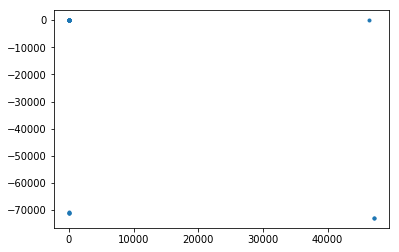

In [155]:
import mplleaflet
plt.scatter(base["lat"], base["lng"], marker=".")

## Convertendo Lontitude e Latitude para Rad

In [156]:
base['lat'] = base['lat']*np.pi/180
base['lng'] = base['lng']*np.pi/180
dadosEstacao['lat'] = dadosEstacao['lat']*np.pi/180
dadosEstacao['lng'] = dadosEstacao['lng']*np.pi/180

In [157]:
base.head(10)

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,0.855986,-2.162174,0.0,62.0,0.0,Variable,50.0,0.0,10.0,...,16.0,30.040000,30.010000,-1.0,48.0,75.0,12.0,69.0,50.0,46.0
1,20150603,0.855986,-2.162174,0.0,52.0,0.0,NE,46.0,0.0,12.0,...,12.0,30.260000,30.030000,38.0,50.0,98.0,6.0,62.0,54.0,40.0
2,20080504,0.810612,-1.106800,0.0,44.0,0.0,ENE,36.0,0.0,6.0,...,7.0,30.220000,30.070000,59.0,36.0,100.0,-2.0,61.0,43.0,28.0
3,20111026,0.807068,-1.109066,0.0,46.0,0.0,NW,51.0,0.0,7.0,...,7.0,29.610000,29.490000,320.0,38.0,95.0,5.0,49.0,45.0,32.0
4,20170501,0.809122,-1.102953,0.0,40.0,0.0,South,32.0,0.0,4.0,...,4.0,30.270000,30.120000,191.0,30.0,83.0,0.0,49.0,39.0,21.0
5,20100709,0.810502,-1.119235,0.0,73.0,0.0,SW,52.0,8.0,21.0,...,22.0,30.010000,29.890000,218.0,66.0,92.0,19.0,80.0,69.0,62.0
6,20110512,0.808688,-1.111839,0.0,42.0,0.0,NE,77.0,0.0,4.0,...,5.0,30.170000,30.040000,39.0,38.0,95.0,4.0,44.0,39.0,37.0
7,20020830,0.884983,-1.694755,0.0,72.0,0.0,SSE,79.0,6.0,22.0,...,22.0,30.067238,29.910724,162.0,69.0,100.0,20.0,75.0,71.0,66.0
8,20020914,0.884983,-1.694755,0.0,54.0,0.0,WNW,38.0,0.0,8.0,...,12.0,30.067238,29.910724,297.0,43.0,96.0,7.0,64.0,46.0,38.0
9,20020917,0.884983,-1.694755,0.0,72.0,0.0,South,41.0,7.0,17.0,...,22.0,30.067238,29.910724,174.0,59.0,88.0,17.0,81.0,63.0,55.0


## Convertendo Objects a Int

In [158]:
objects = []
for c in base.columns:
    if (base[c].dtype == 'object'):
        objects.append(c)
objects

['meanwdire', 'precipi', 'precipsource', 'precipm']

### meanwdire

In [159]:
set(base['meanwdire'])

{nan,
 'ENE',
 'ESE',
 'East',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'North',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'South',
 'Variable',
 'WNW',
 'WSW',
 'West'}

In [160]:
base['meanwdire'].replace({'ENE':0,'ESE':1,'East':2,'NE':3,'NNE':3,'NNW':4,'NW':5,'North':6,'SE':7,'SSE':8,'SSW':9,'SW':10,'SW':11,'South':11,'Variable':12,'WNW':13,'WSW':14,'West':15},inplace=True)

In [161]:
set(base['meanwdire'])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 nan,
 7.0,
 8.0,
 9.0,
 nan,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 6.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

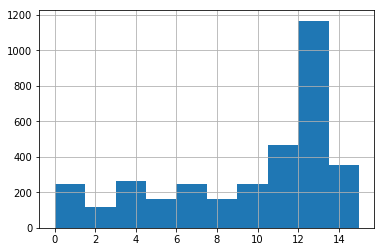

In [162]:
base['meanwdire'].hist()

In [163]:
base['meanwdire'].fillna(13, inplace=True)

In [164]:
base['meanwdire'].count()

3682

In [165]:
base.shape

(3682, 43)

### precipi

In [166]:
set(base['precipi'])

{nan,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.23',
 '0.24',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35',
 '0.36',
 '0.37',
 '0.39',
 '0.42',
 '0.43',
 '0.45',
 '0.46',
 '0.47',
 '0.48',
 '0.50',
 '0.51',
 '0.53',
 '0.54',
 '0.55',
 '0.56',
 '0.59',
 '0.60',
 '0.61',
 '0.62',
 '0.63',
 '0.64',
 '0.67',
 '0.71',
 '0.75',
 '0.79',
 '0.83',
 '0.87',
 '0.91',
 '0.96',
 '0.97',
 '0.98',
 '1.00',
 '1.10',
 '1.12',
 '1.14',
 '1.18',
 '1.26',
 '1.38',
 '1.46',
 '1.54',
 '1.57',
 '1.81',
 '1.85',
 '2.01',
 '2.60',
 '5.59',
 'T'}

In [167]:
base['precipi'].replace({'T':6},inplace=True)

In [168]:
set(base['precipi'])

{nan,
 6,
 '0.00',
 '0.01',
 '0.02',
 '0.03',
 '0.04',
 '0.05',
 '0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.23',
 '0.24',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35',
 '0.36',
 '0.37',
 '0.39',
 '0.42',
 '0.43',
 '0.45',
 '0.46',
 '0.47',
 '0.48',
 '0.50',
 '0.51',
 '0.53',
 '0.54',
 '0.55',
 '0.56',
 '0.59',
 '0.60',
 '0.61',
 '0.62',
 '0.63',
 '0.64',
 '0.67',
 '0.71',
 '0.75',
 '0.79',
 '0.83',
 '0.87',
 '0.91',
 '0.96',
 '0.97',
 '0.98',
 '1.00',
 '1.10',
 '1.12',
 '1.14',
 '1.18',
 '1.26',
 '1.38',
 '1.46',
 '1.54',
 '1.57',
 '1.81',
 '1.85',
 '2.01',
 '2.60',
 '5.59'}

In [169]:
base['precipi'] = base['precipi'].astype('float')

In [170]:
set(base['precipi'])

{0.0,
 nan,
 nan,
 0.03,
 0.24,
 0.39,
 0.98,
 1.0,
 nan,
 0.12,
 0.46,
 0.51,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.26,
 6.0,
 nan,
 nan,
 0.71,
 2.01,
 nan,
 nan,
 nan,
 0.22,
 nan,
 nan,
 nan,
 nan,
 0.45,
 0.59,
 nan,
 nan,
 nan,
 0.19,
 0.2,
 0.55,
 0.67,
 1.18,
 nan,
 nan,
 nan,
 0.96,
 nan,
 nan,
 nan,
 nan,
 0.28,
 nan,
 nan,
 nan,
 nan,
 0.07,
 0.17,
 0.21,
 0.29,
 1.14,
 1.85,
 nan,
 0.09,
 0.43,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.01,
 0.42,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.18,
 0.3,
 nan,
 0.1,
 0.11,
 0.31,
 0.5,
 0.56,
 0.6,
 nan,
 0.13,
 0.61,
 1.12,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.46,
 nan,
 nan,
 0.36,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.64,
 1.38,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.54,
 2.6,
 nan,
 nan,
 nan,
 nan,
 0.33,
 nan,
 nan,
 1.57,
 nan,
 nan,
 nan,
 nan,
 0.23,
 nan,
 nan,
 0.08,
 nan,
 nan,
 0.02,
 nan,
 nan,
 0.34,
 0.53,
 0.63,
 0.75,
 0.87,
 nan,
 nan,
 nan,
 1.54,
 nan,
 nan,
 nan,
 nan,
 0.47,
 nan,
 0.04

In [171]:
base['precipi'].count()

3561

In [172]:
base['precipi'].fillna(base['precipi'].mean(),inplace=True)

In [173]:
base['precipi'].count()

3682

### precipm 

In [174]:
set(base['precipm'])

{nan,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.27',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.67',
 '10.7',
 '11.0',
 '11.4',
 '11.7',
 '12.0',
 '12.19',
 '12.70',
 '13.0',
 '13.46',
 '13.72',
 '14.0',
 '14.22',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.3',
 '17.0',
 '18.0',
 '19.0',
 '2.0',
 '2.03',
 '2.29',
 '2.3',
 '2.5',
 '2.8',
 '20.0',
 '20.1',
 '21.0',
 '22.0',
 '23.0',
 '24.38',
 '24.6',
 '25.0',
 '25.40',
 '28.0',
 '28.4',
 '29.0',
 '29.97',
 '3.0',
 '3.3',
 '3.30',
 '3.56',
 '3.6',
 '32.0',
 '35.0',
 '37.0',
 '37.1',
 '39.0',
 '39.88',
 '4.0',
 '4.06',
 '4.1',
 '4.57',
 '4.83',
 '45.97',
 '47.0',
 '5.0',
 '5.1',
 '5.33',
 '5.8',
 '51.0',
 '6.0',
 '6.1',
 '6.6',
 '6.60',
 '66.1',
 '7.0',
 '7.1',
 '7.4',
 '7.62',
 '8.0',
 '8.13',
 '8.4',
 '8.6',
 '8.64',
 '9.0',
 '9.2',
 '9.4',
 'T'}

In [175]:
base['precipm'].replace({'T': 10},inplace=True)

In [176]:
set(base['precipm'])

{nan,
 10,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.27',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.67',
 '10.7',
 '11.0',
 '11.4',
 '11.7',
 '12.0',
 '12.19',
 '12.70',
 '13.0',
 '13.46',
 '13.72',
 '14.0',
 '14.22',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.3',
 '17.0',
 '18.0',
 '19.0',
 '2.0',
 '2.03',
 '2.29',
 '2.3',
 '2.5',
 '2.8',
 '20.0',
 '20.1',
 '21.0',
 '22.0',
 '23.0',
 '24.38',
 '24.6',
 '25.0',
 '25.40',
 '28.0',
 '28.4',
 '29.0',
 '29.97',
 '3.0',
 '3.3',
 '3.30',
 '3.56',
 '3.6',
 '32.0',
 '35.0',
 '37.0',
 '37.1',
 '39.0',
 '39.88',
 '4.0',
 '4.06',
 '4.1',
 '4.57',
 '4.83',
 '45.97',
 '47.0',
 '5.0',
 '5.1',
 '5.33',
 '5.8',
 '51.0',
 '6.0',
 '6.1',
 '6.6',
 '6.60',
 '66.1',
 '7.0',
 '7.1',
 '7.4',
 '7.62',
 '8.0',
 '8.13',
 '8.4',
 '8.6',
 '8.64',
 '9.0',
 '9.2',
 '9.4'}

In [177]:
base['precipm'] = base['precipm'].astype("float")

In [178]:
base['precipm'].count()

3561

In [179]:
base['precipm'].fillna(base['precipm'].mean(),inplace=True)

In [180]:
base['precipm'].count()

3682

### precipsource

In [181]:
set(base['precipsource'])

{nan, '3Or6HourObs', 'HourlyObs', 'Precip24Synop', 'Precip6GroupSynop'}

In [182]:
base['precipsource'].replace({'3Or6HourObs':0,'HourlyObs':1,'Precip24Synop':2,'Precip6GroupSynop':3},inplace=True)

In [183]:
set(base['precipsource'])

{0.0,
 1.0,
 2.0,
 3.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [184]:
base['precipsource'].count()

3430

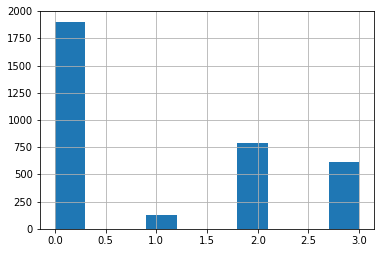

In [185]:
base['precipsource'].hist()

In [186]:
base['precipsource'].fillna(0,inplace=True)

In [187]:
base['precipsource'].count()

3682

## Criando base usando as estações do ano 

In [188]:
primavera = base.loc[(base['date']%1000<=620) & (base['date']%1000>=320)]
primavera['date'] = "0" #Primavera
verao = base.loc[(base['date']%1000<=921) & (base['date']%1000>=621)]
verao['date'] = "1" #Verão
outono = base.loc[(base['date']%1000<=1220) & (base['date']%1000>=922)]
outono['date'] = "2" #Outono
inverno = base.loc[(base['date']%1000<=1221) & (base['date']%1000>=319)]
inverno['date'] = "3" #Inverno
frames = [primavera,verao,outono,inverno]
dadosEstacao = pd.concat(frames)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [189]:
dadosEstacao

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,0,0.855986,-2.162174,0.000000,62.000000,0.000000,12.0,50.000000,0.00000,10.000000,...,16.000000,30.040000,30.010000,-1.000000,48.000000,75.000000,12.000000,69.000000,50.000000,46.000000
1,0,0.855986,-2.162174,0.000000,52.000000,0.000000,3.0,46.000000,0.00000,12.000000,...,12.000000,30.260000,30.030000,38.000000,50.000000,98.000000,6.000000,62.000000,54.000000,40.000000
2,0,0.810612,-1.106800,0.000000,44.000000,0.000000,0.0,36.000000,0.00000,6.000000,...,7.000000,30.220000,30.070000,59.000000,36.000000,100.000000,-2.000000,61.000000,43.000000,28.000000
4,0,0.809122,-1.102953,0.000000,40.000000,0.000000,11.0,32.000000,0.00000,4.000000,...,4.000000,30.270000,30.120000,191.000000,30.000000,83.000000,0.000000,49.000000,39.000000,21.000000
6,0,0.808688,-1.111839,0.000000,42.000000,0.000000,3.0,77.000000,0.00000,4.000000,...,5.000000,30.170000,30.040000,39.000000,38.000000,95.000000,4.000000,44.000000,39.000000,37.000000
35,0,0.875937,-1.695151,0.000000,44.000000,0.000000,12.0,9.000000,0.00000,-4.000000,...,6.000000,29.920000,29.720000,-1.000000,18.000000,67.000000,0.000000,58.000000,25.000000,12.000000
36,0,0.875937,-1.695151,0.000000,46.000000,0.000000,12.0,7.000000,0.00000,-7.000000,...,8.000000,30.110000,29.990000,-1.000000,16.000000,39.000000,0.000000,69.000000,20.000000,12.000000
37,0,0.875937,-1.695151,0.000000,62.000000,0.000000,12.0,9.000000,0.00000,-1.000000,...,16.000000,29.890000,29.790000,-1.000000,27.000000,29.000000,11.000000,76.000000,30.000000,20.000000
38,0,0.875937,-1.695151,0.000000,48.000000,0.000000,12.0,14.000000,0.00000,0.000000,...,8.000000,30.100000,29.910000,-1.000000,29.000000,53.000000,4.000000,62.000000,32.000000,25.000000
39,0,0.875937,-1.695151,0.000000,52.000000,0.000000,12.0,16.000000,0.00000,1.000000,...,11.000000,30.150000,30.030000,-1.000000,28.000000,38.000000,4.000000,66.000000,33.000000,24.000000


## Atualizando a Data para somente o mês

In [190]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,0.855986,-2.162174,0.000000,62.000000,0.000000,12.0,50.000000,0.00000,10.000000,...,16.000000,30.040000,30.010000,-1.000000,48.000000,75.000000,12.000000,69.000000,50.000000,46.000000
1,20150603,0.855986,-2.162174,0.000000,52.000000,0.000000,3.0,46.000000,0.00000,12.000000,...,12.000000,30.260000,30.030000,38.000000,50.000000,98.000000,6.000000,62.000000,54.000000,40.000000
2,20080504,0.810612,-1.106800,0.000000,44.000000,0.000000,0.0,36.000000,0.00000,6.000000,...,7.000000,30.220000,30.070000,59.000000,36.000000,100.000000,-2.000000,61.000000,43.000000,28.000000
3,20111026,0.807068,-1.109066,0.000000,46.000000,0.000000,5.0,51.000000,0.00000,7.000000,...,7.000000,29.610000,29.490000,320.000000,38.000000,95.000000,5.000000,49.000000,45.000000,32.000000
4,20170501,0.809122,-1.102953,0.000000,40.000000,0.000000,11.0,32.000000,0.00000,4.000000,...,4.000000,30.270000,30.120000,191.000000,30.000000,83.000000,0.000000,49.000000,39.000000,21.000000
5,20100709,0.810502,-1.119235,0.000000,73.000000,0.000000,11.0,52.000000,8.00000,21.000000,...,22.000000,30.010000,29.890000,218.000000,66.000000,92.000000,19.000000,80.000000,69.000000,62.000000
6,20110512,0.808688,-1.111839,0.000000,42.000000,0.000000,3.0,77.000000,0.00000,4.000000,...,5.000000,30.170000,30.040000,39.000000,38.000000,95.000000,4.000000,44.000000,39.000000,37.000000
7,20020830,0.884983,-1.694755,0.000000,72.000000,0.000000,8.0,79.000000,6.00000,22.000000,...,22.000000,30.067238,29.910724,162.000000,69.000000,100.000000,20.000000,75.000000,71.000000,66.000000
8,20020914,0.884983,-1.694755,0.000000,54.000000,0.000000,13.0,38.000000,0.00000,8.000000,...,12.000000,30.067238,29.910724,297.000000,43.000000,96.000000,7.000000,64.000000,46.000000,38.000000
9,20020917,0.884983,-1.694755,0.000000,72.000000,0.000000,11.0,41.000000,7.00000,17.000000,...,22.000000,30.067238,29.910724,174.000000,59.000000,88.000000,17.000000,81.000000,63.000000,55.000000


In [191]:
base['date'] = (base['date']//100)%100

In [192]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,6,0.855986,-2.162174,0.000000,62.000000,0.000000,12.0,50.000000,0.00000,10.000000,...,16.000000,30.040000,30.010000,-1.000000,48.000000,75.000000,12.000000,69.000000,50.000000,46.000000
1,6,0.855986,-2.162174,0.000000,52.000000,0.000000,3.0,46.000000,0.00000,12.000000,...,12.000000,30.260000,30.030000,38.000000,50.000000,98.000000,6.000000,62.000000,54.000000,40.000000
2,5,0.810612,-1.106800,0.000000,44.000000,0.000000,0.0,36.000000,0.00000,6.000000,...,7.000000,30.220000,30.070000,59.000000,36.000000,100.000000,-2.000000,61.000000,43.000000,28.000000
3,10,0.807068,-1.109066,0.000000,46.000000,0.000000,5.0,51.000000,0.00000,7.000000,...,7.000000,29.610000,29.490000,320.000000,38.000000,95.000000,5.000000,49.000000,45.000000,32.000000
4,5,0.809122,-1.102953,0.000000,40.000000,0.000000,11.0,32.000000,0.00000,4.000000,...,4.000000,30.270000,30.120000,191.000000,30.000000,83.000000,0.000000,49.000000,39.000000,21.000000
5,7,0.810502,-1.119235,0.000000,73.000000,0.000000,11.0,52.000000,8.00000,21.000000,...,22.000000,30.010000,29.890000,218.000000,66.000000,92.000000,19.000000,80.000000,69.000000,62.000000
6,5,0.808688,-1.111839,0.000000,42.000000,0.000000,3.0,77.000000,0.00000,4.000000,...,5.000000,30.170000,30.040000,39.000000,38.000000,95.000000,4.000000,44.000000,39.000000,37.000000
7,8,0.884983,-1.694755,0.000000,72.000000,0.000000,8.0,79.000000,6.00000,22.000000,...,22.000000,30.067238,29.910724,162.000000,69.000000,100.000000,20.000000,75.000000,71.000000,66.000000
8,9,0.884983,-1.694755,0.000000,54.000000,0.000000,13.0,38.000000,0.00000,8.000000,...,12.000000,30.067238,29.910724,297.000000,43.000000,96.000000,7.000000,64.000000,46.000000,38.000000
9,9,0.884983,-1.694755,0.000000,72.000000,0.000000,11.0,41.000000,7.00000,17.000000,...,22.000000,30.067238,29.910724,174.000000,59.000000,88.000000,17.000000,81.000000,63.000000,55.000000


## Padronizando com o MinMaxScaler

In [195]:
padraoMes = MinMaxScaler().fit_transform(base)
padraoEstacao = MinMaxScaler().fit_transform(dadosEstacao)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [196]:
padraoMes

array([[4.54545455e-01, 1.49171900e-04, 9.99023249e-01, ...,
        5.08064516e-01, 5.86956522e-01, 7.31481481e-01],
       [4.54545455e-01, 1.49171900e-04, 9.99023249e-01, ...,
        4.51612903e-01, 6.30434783e-01, 6.75925926e-01],
       [3.63636364e-01, 9.39234821e-05, 9.99853400e-01, ...,
        4.43548387e-01, 5.10869565e-01, 5.64814815e-01],
       ...,
       [3.63636364e-01, 1.46817868e-04, 9.99931001e-01, ...,
        5.48387097e-01, 4.67391304e-01, 5.55555556e-01],
       [3.63636364e-01, 1.46723141e-04, 9.99929354e-01, ...,
        4.51612903e-01, 6.19565217e-01, 6.75925926e-01],
       [3.63636364e-01, 1.47928036e-04, 9.99931015e-01, ...,
        5.00000000e-01, 6.24151400e-01, 6.97165880e-01]])

In [197]:
padraoEstacao

array([[0.00000000e+00, 1.49171900e-04, 9.99023249e-01, ...,
        4.55357143e-01, 4.93333333e-01, 6.02739726e-01],
       [0.00000000e+00, 1.49171900e-04, 9.99023249e-01, ...,
        3.92857143e-01, 5.46666667e-01, 5.20547945e-01],
       [0.00000000e+00, 9.39234821e-05, 9.99853400e-01, ...,
        3.83928571e-01, 4.00000000e-01, 3.56164384e-01],
       ...,
       [1.00000000e+00, 1.46817868e-04, 9.99931001e-01, ...,
        5.00000000e-01, 3.46666667e-01, 3.42465753e-01],
       [1.00000000e+00, 1.46723141e-04, 9.99929354e-01, ...,
        3.92857143e-01, 5.33333333e-01, 5.20547945e-01],
       [1.00000000e+00, 1.47928036e-04, 9.99931015e-01, ...,
        4.46428571e-01, 5.38959051e-01, 5.51971439e-01]])

## Autoencoder